<a href="https://colab.research.google.com/github/MissoumYoucef/Kaggle_Competition/blob/main/House_prices_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Separate target from predictors
X = train_data.drop(['SalePrice'], axis=1)

In [4]:
y = train_data.SalePrice

In [5]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Id')
len(numerical_cols)

36

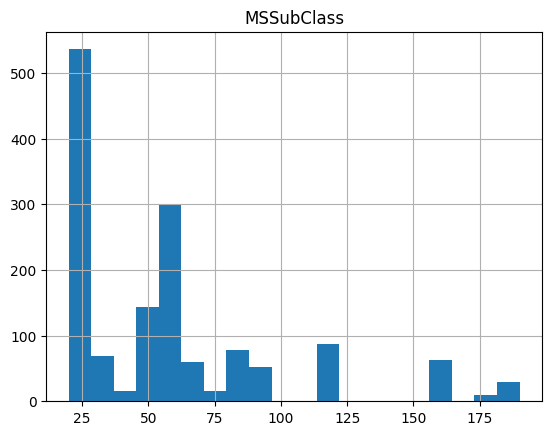

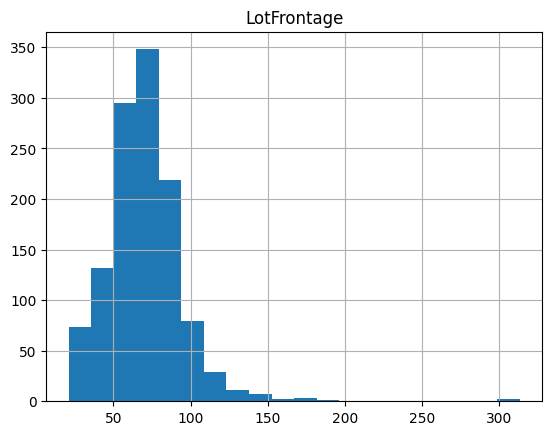

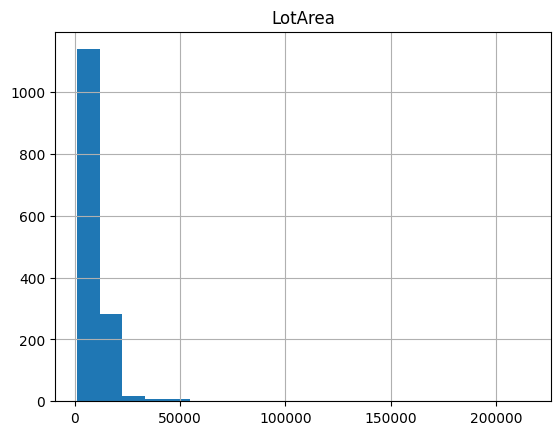

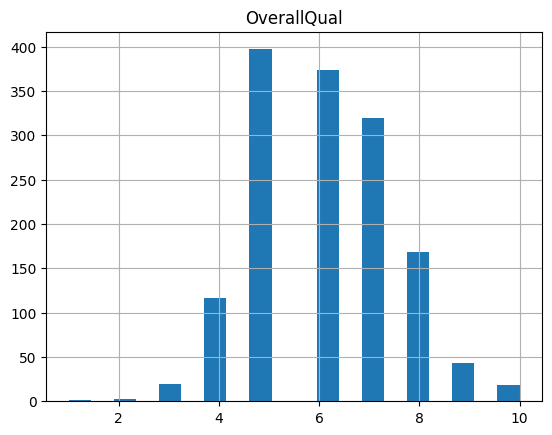

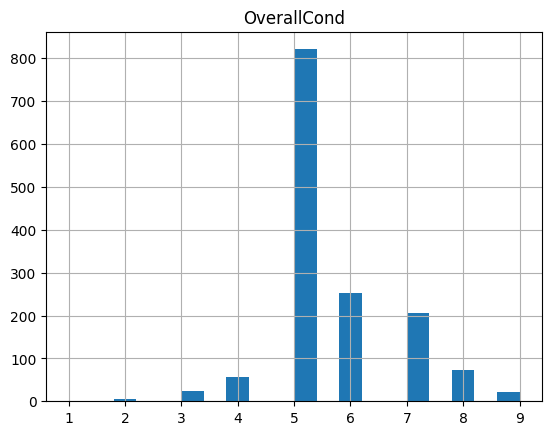

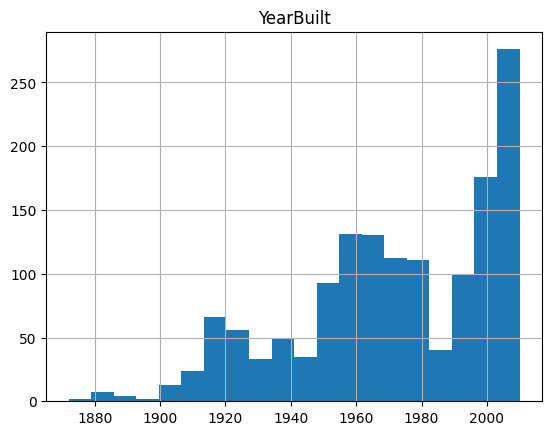

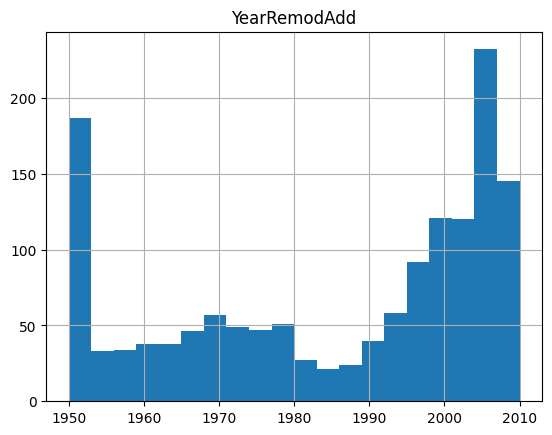

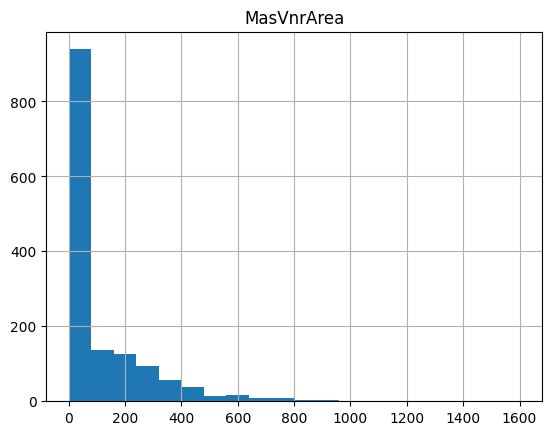

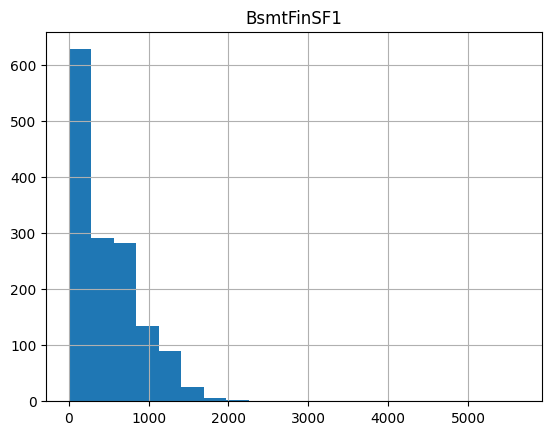

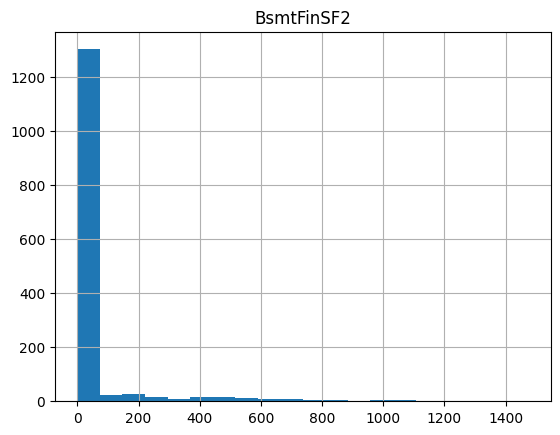

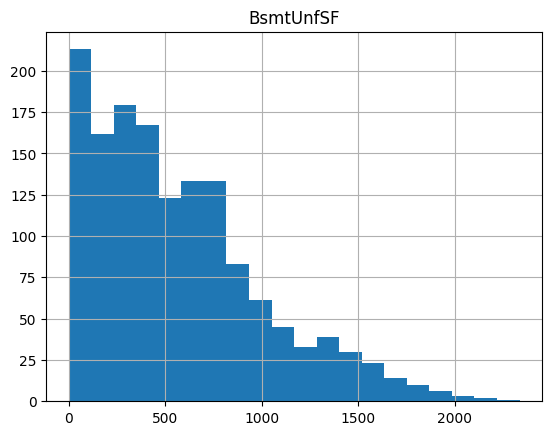

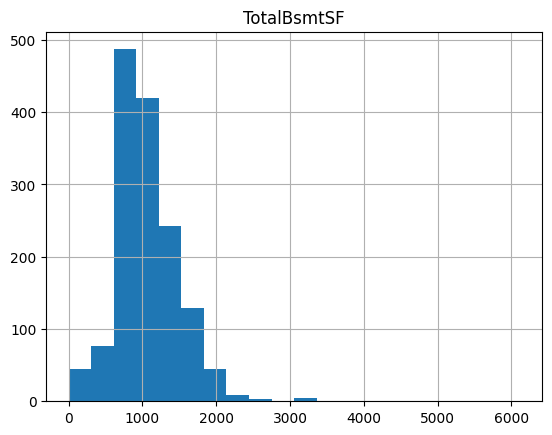

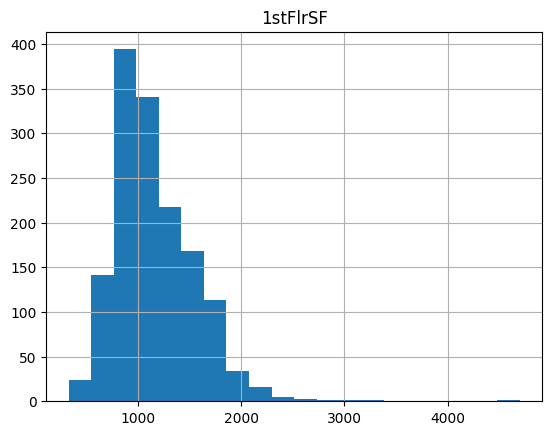

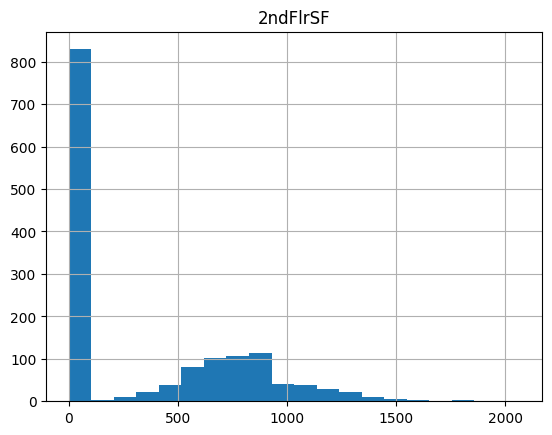

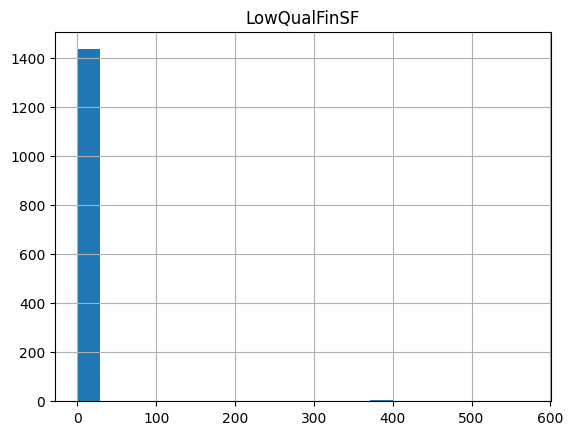

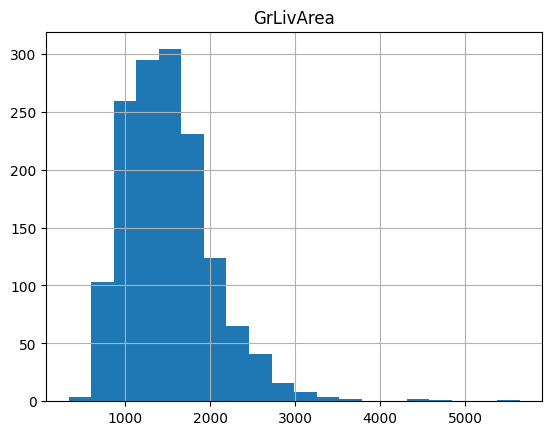

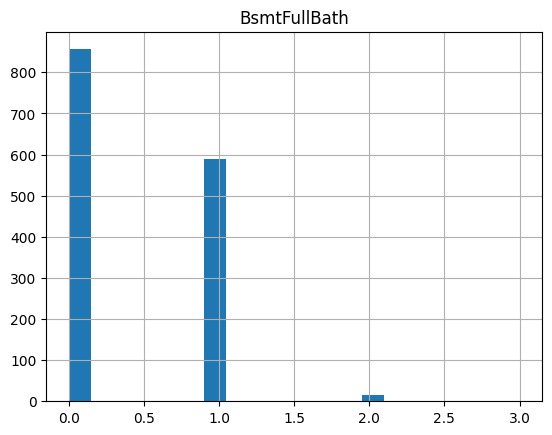

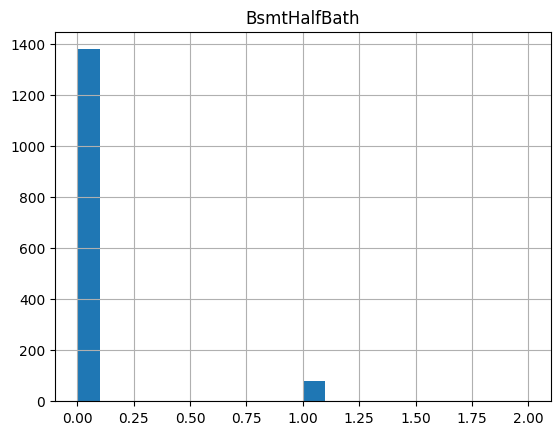

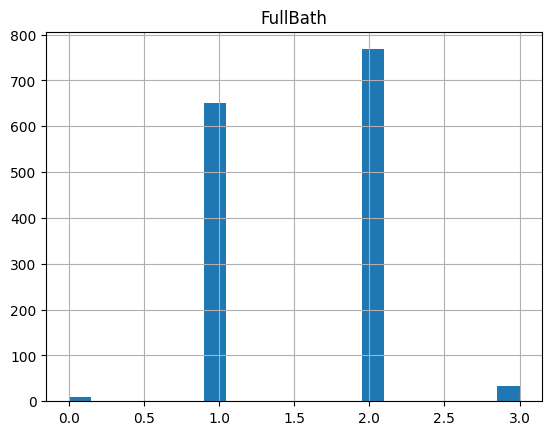

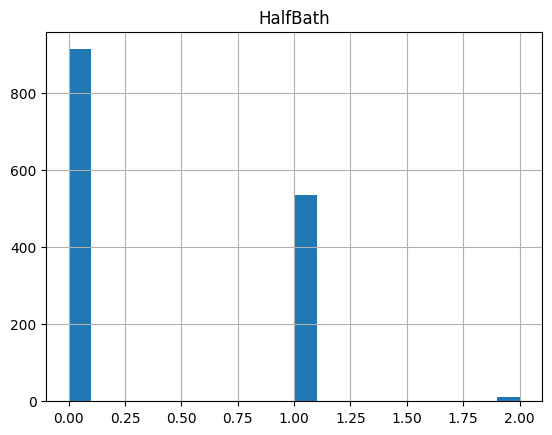

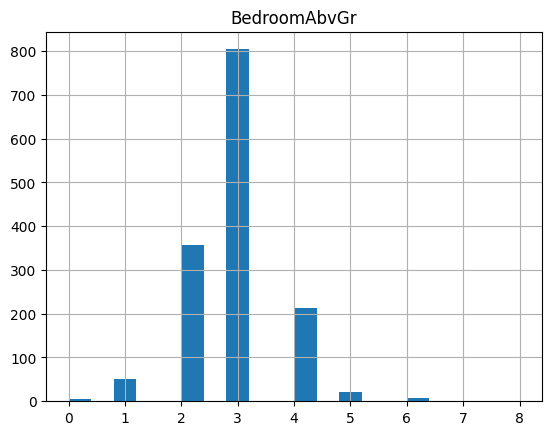

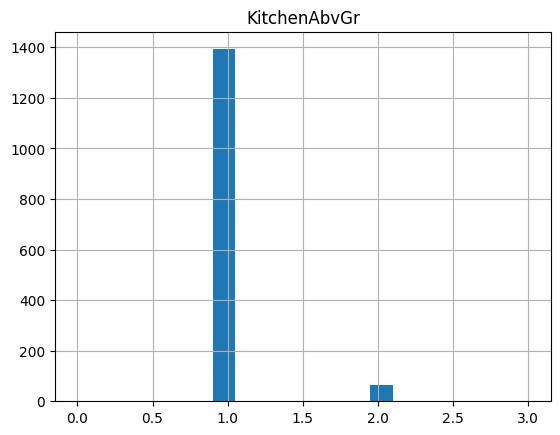

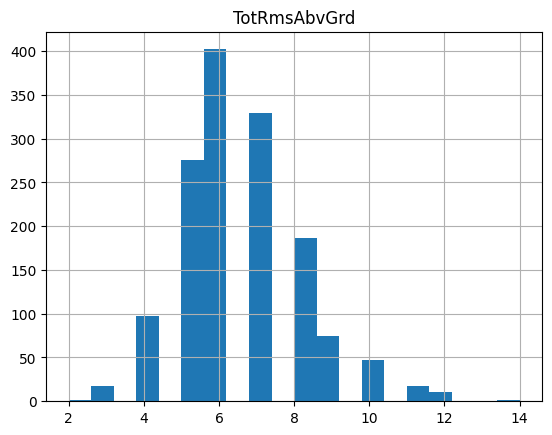

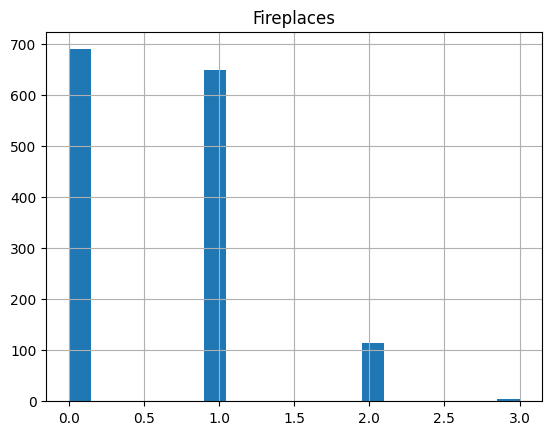

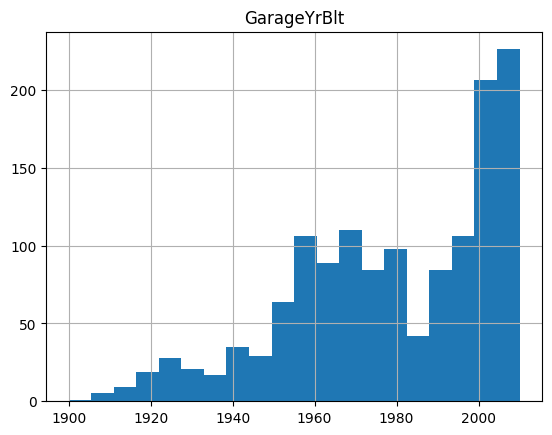

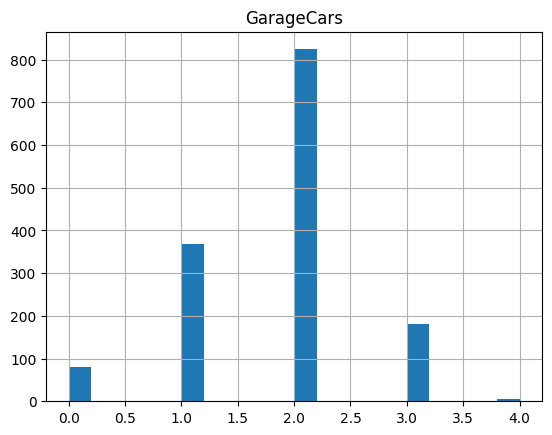

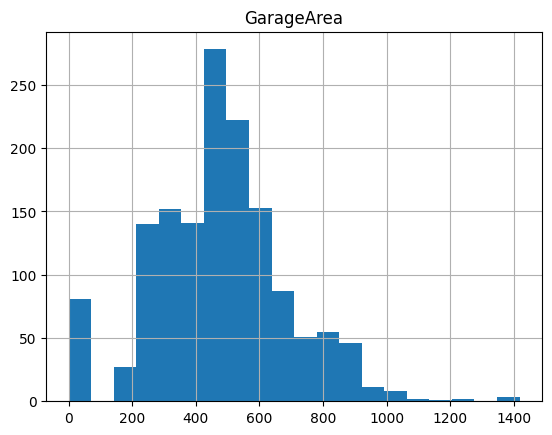

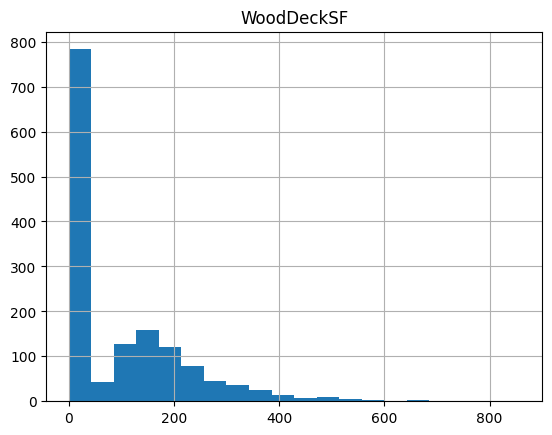

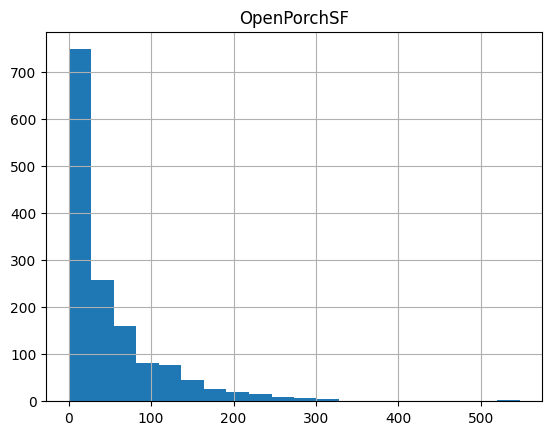

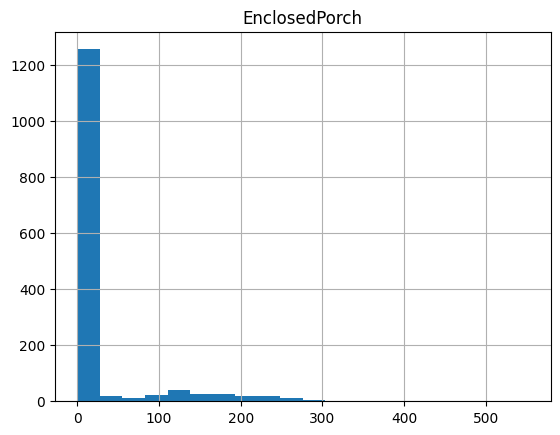

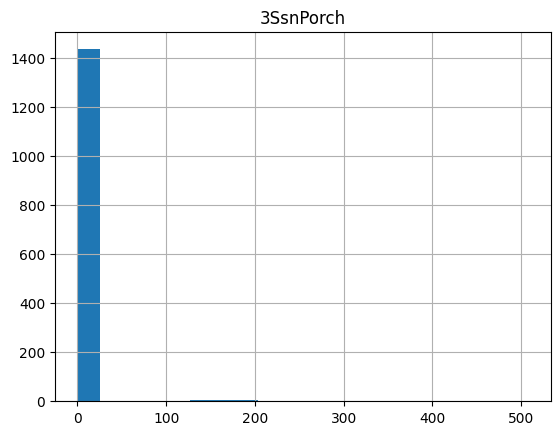

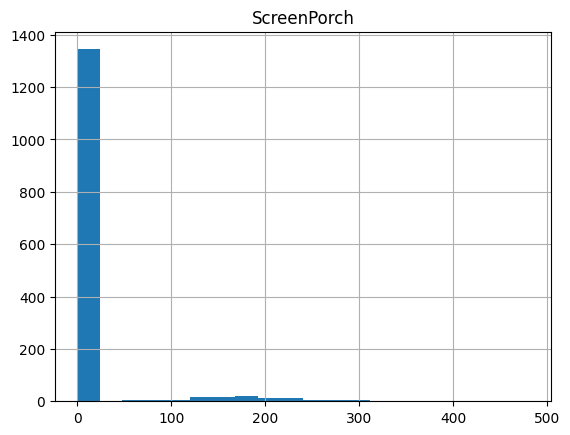

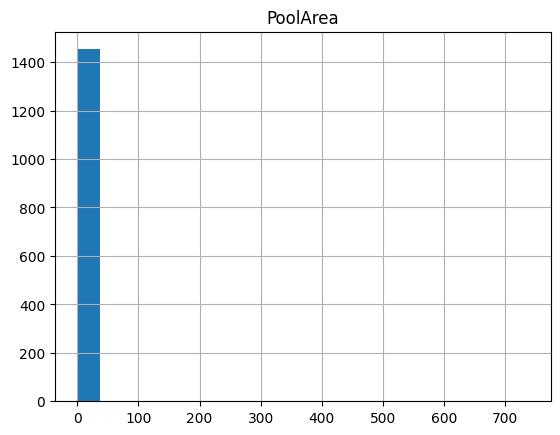

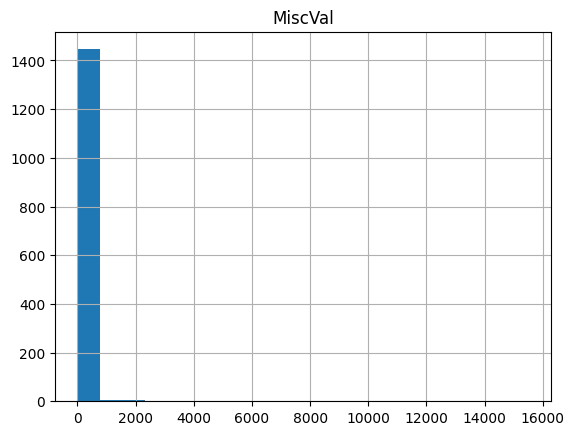

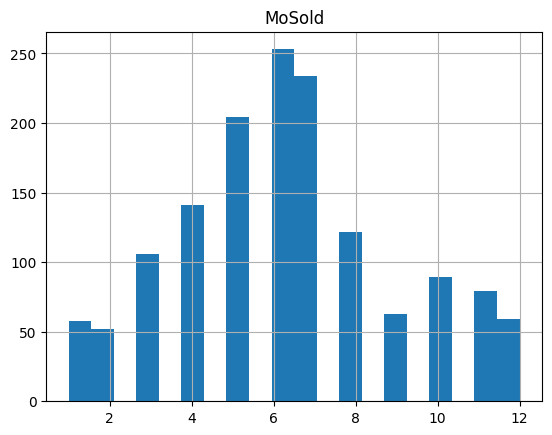

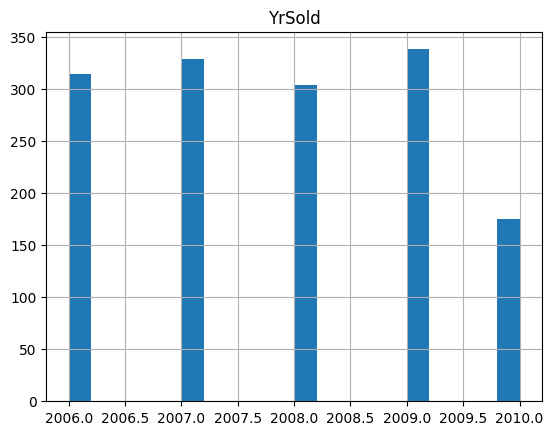

In [6]:
# Plot histogram and density plot
for column in numerical_cols:
    plt.figure()
    X[column].hist(bins=20)  # You can customize the number of bins
    plt.title(column)
    plt.show()

In [7]:
# Select numerical columns (excluding 'object' type which is often used for categorical data)
numerical_cols = X.select_dtypes(include=['int64', 'float64'])

# Apply log transformation to numerical columns only
log_transformed_numerical = numerical_cols.apply(lambda x: np.log(x + 1))

In [8]:
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Combine the transformed numerical columns and the unchanged categorical columns back into one DataFrame
X = pd.concat([log_transformed_numerical, categorical_cols], axis=1)

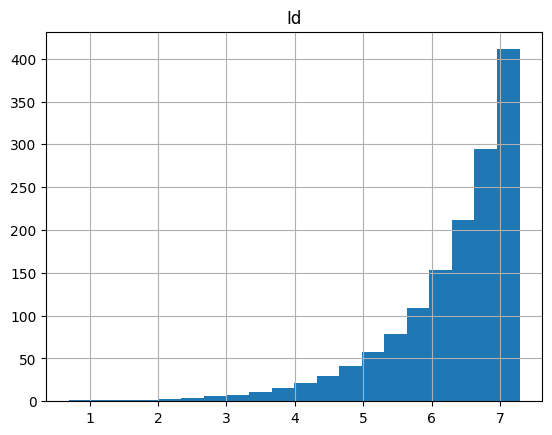

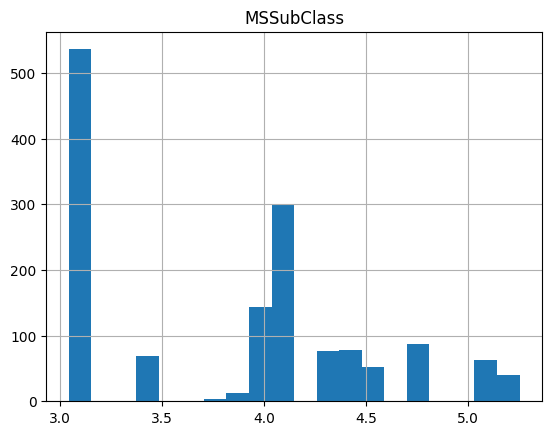

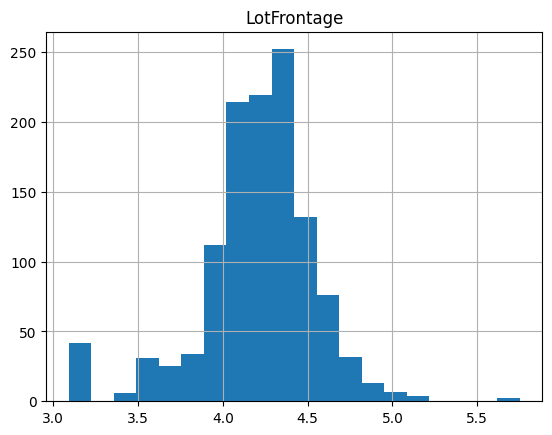

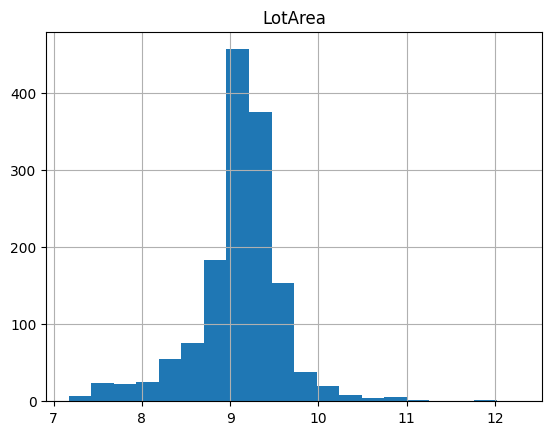

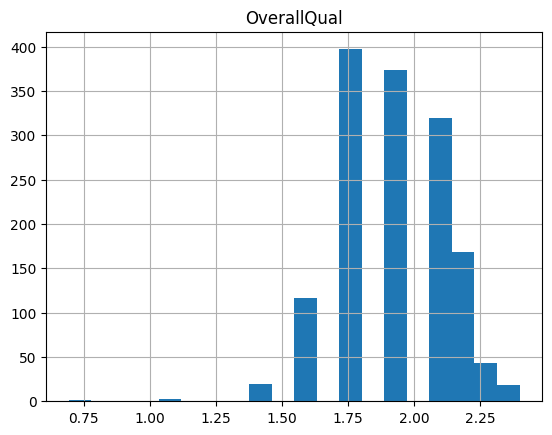

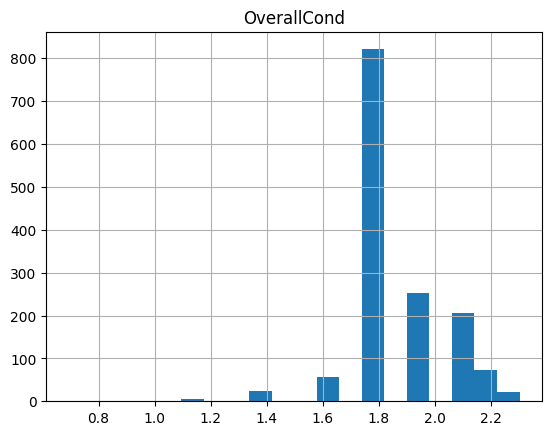

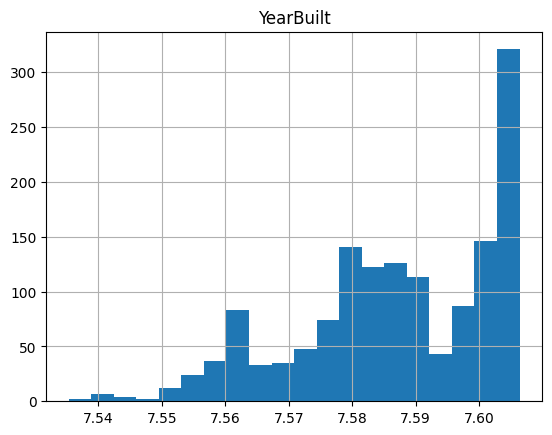

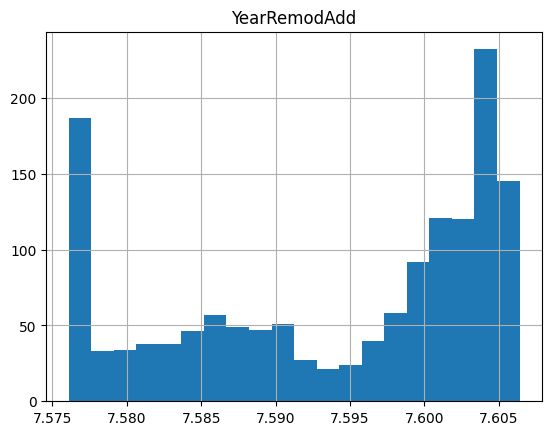

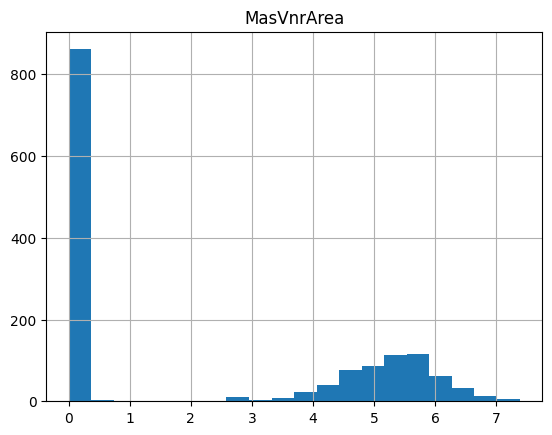

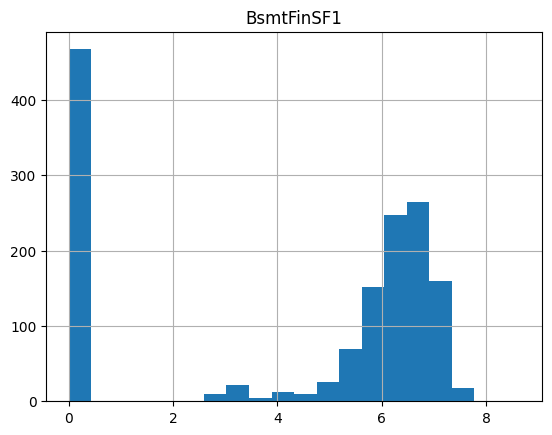

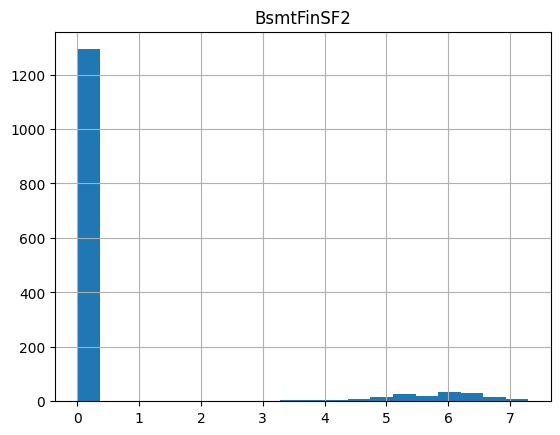

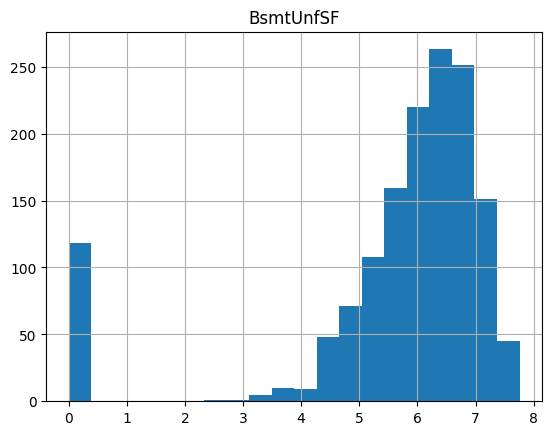

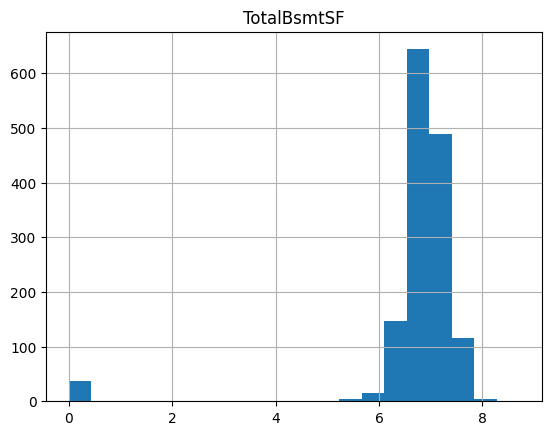

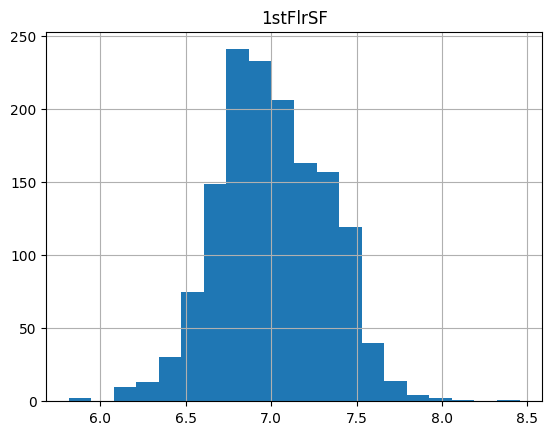

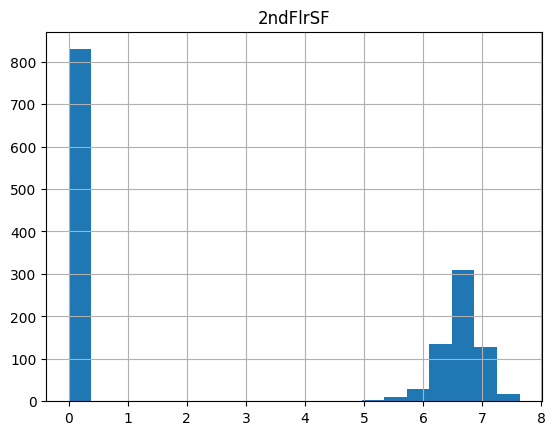

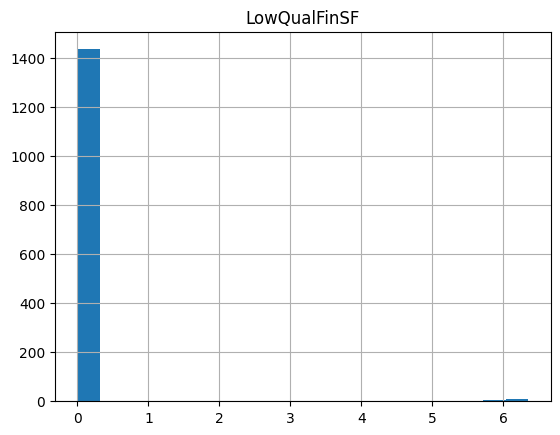

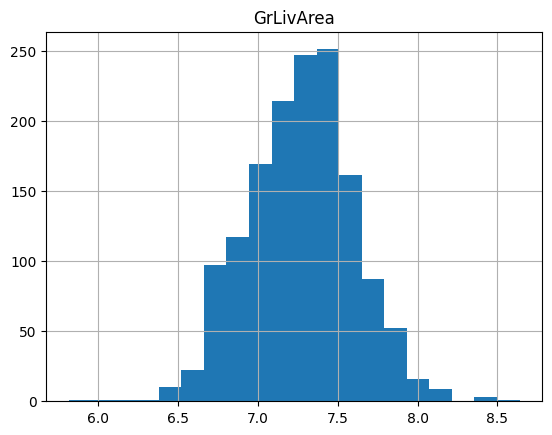

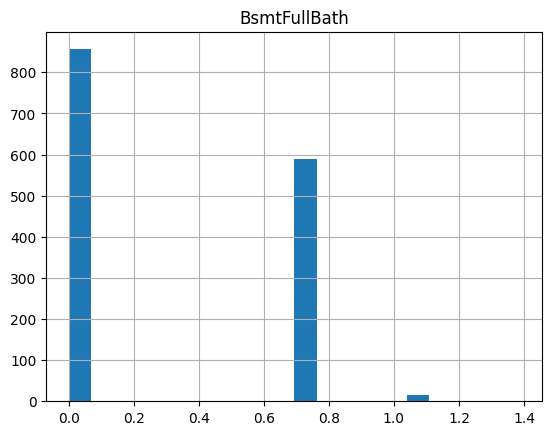

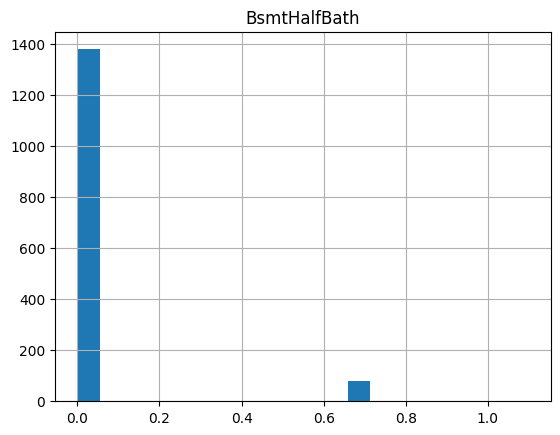

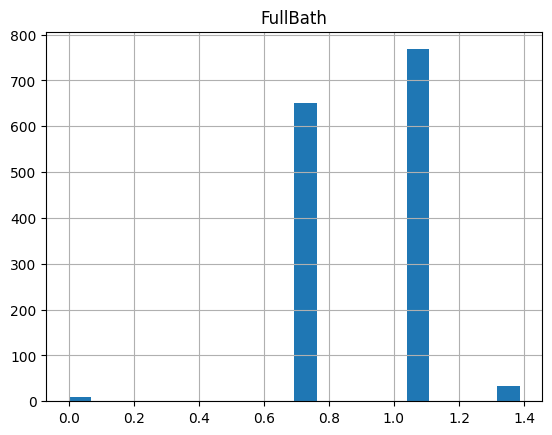

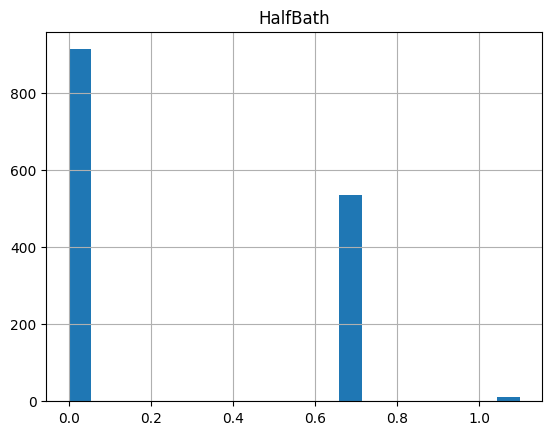

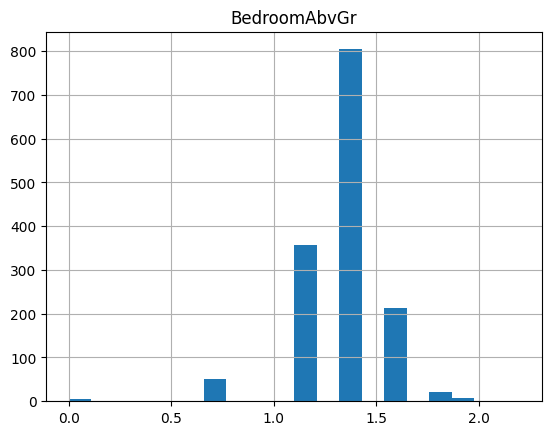

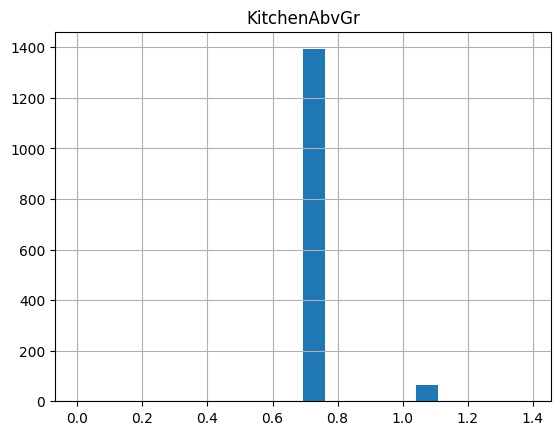

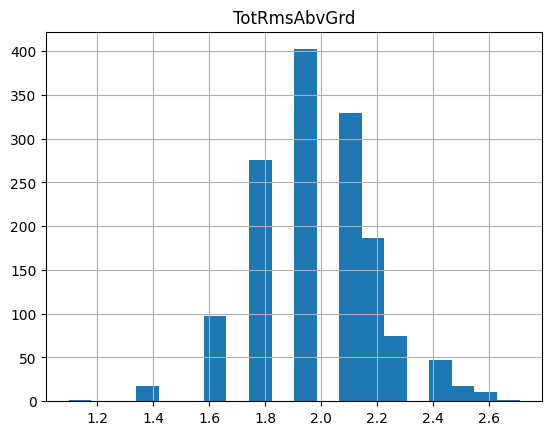

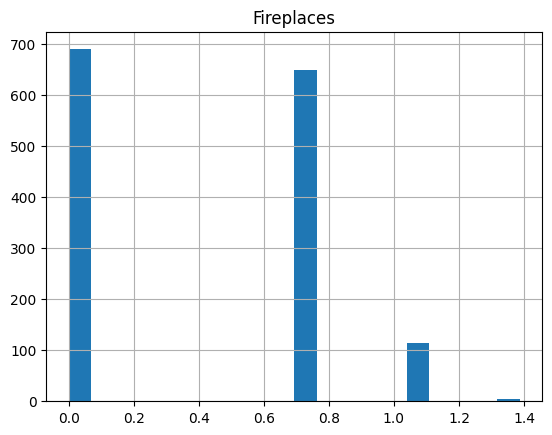

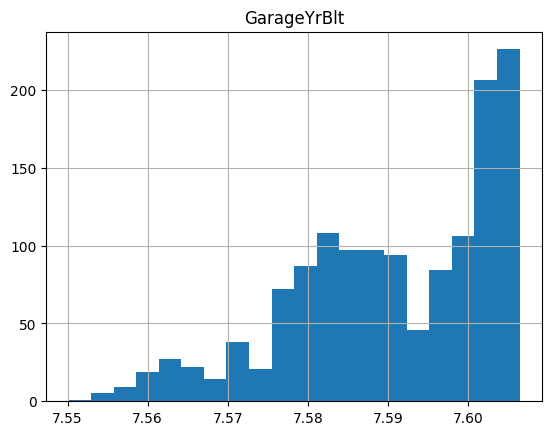

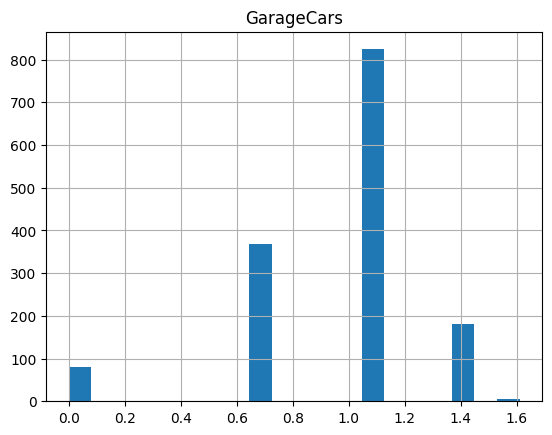

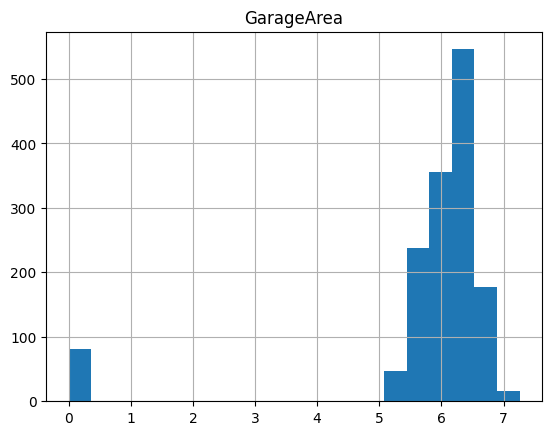

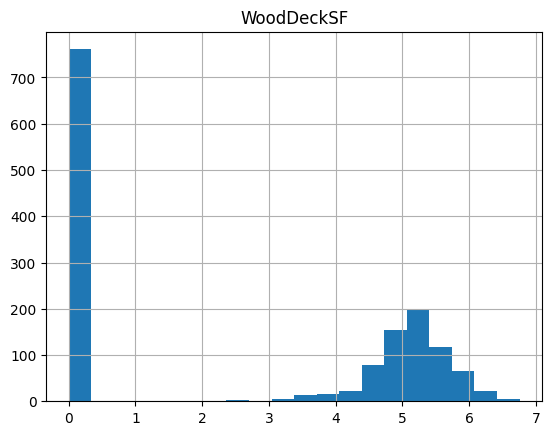

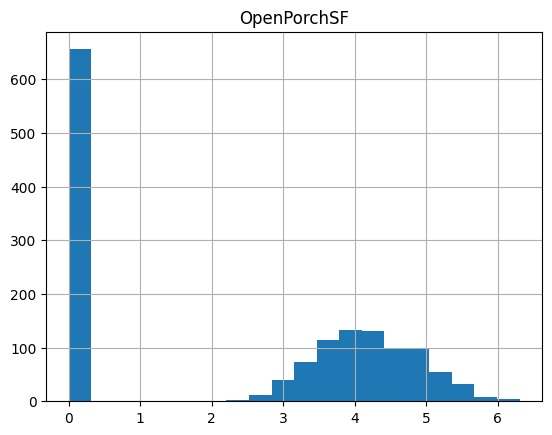

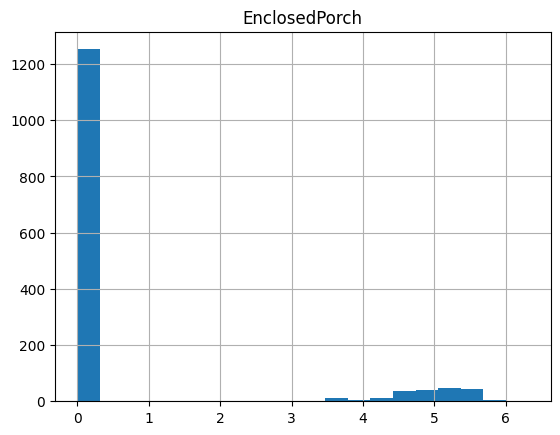

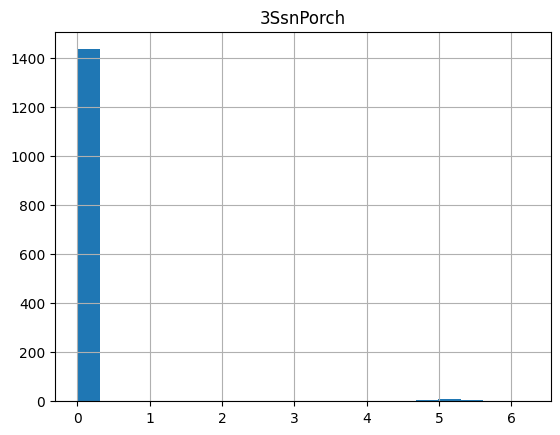

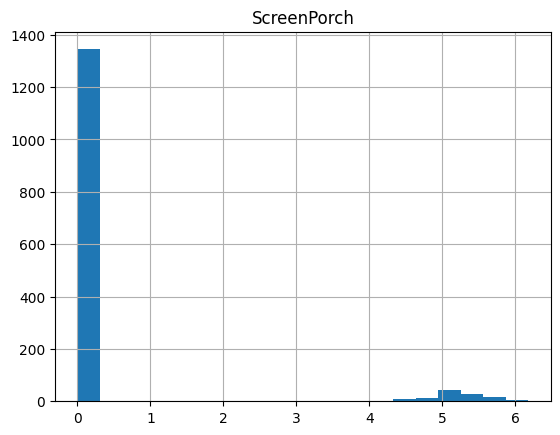

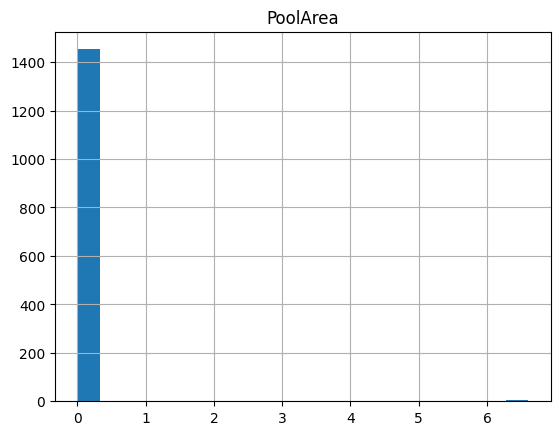

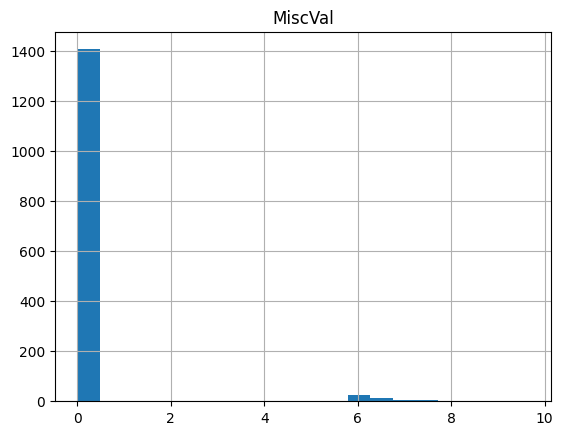

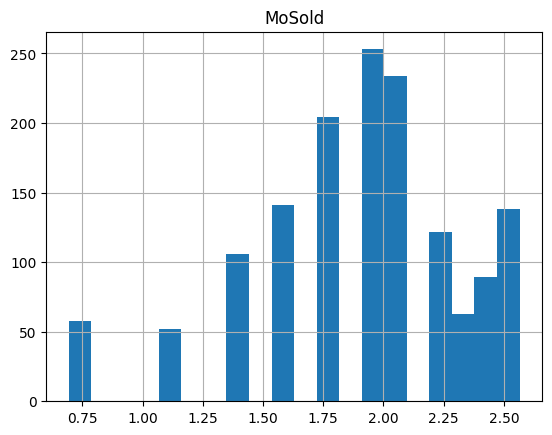

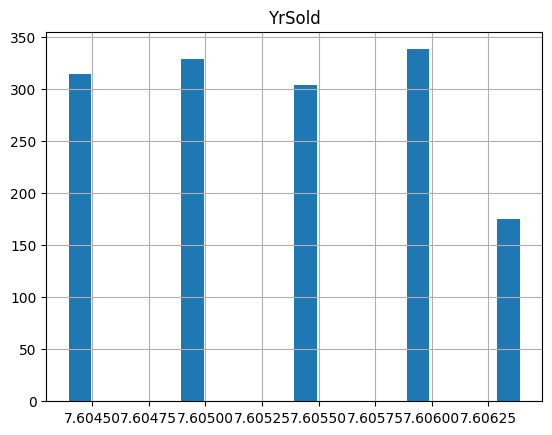

In [9]:
# Plot histogram and density plot
for column in numerical_cols:
    plt.figure()
    X[column].hist(bins=20)  # You can customize the number of bins
    plt.title(column)
    plt.show()

In [10]:
y = np.log(y)

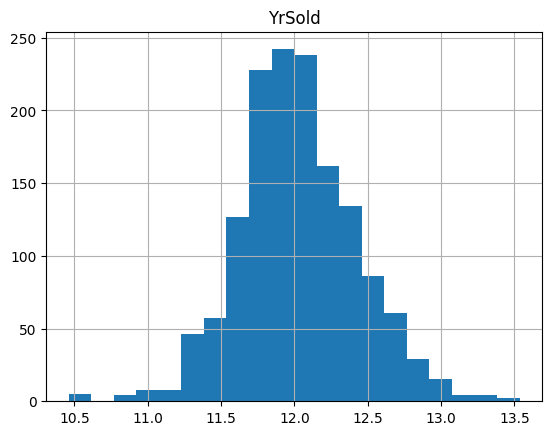

In [11]:
  plt.figure()
  y.hist(bins=20)  # You can customize the number of bins
  plt.title(column)
  plt.show()

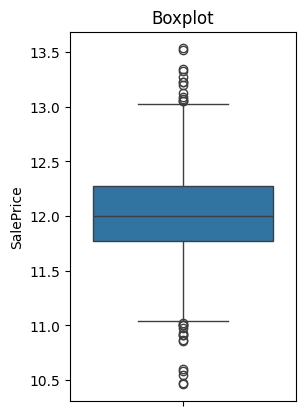

In [12]:
# Plot QQ plot
plt.subplot(1, 2, 2)
sns.boxplot(y)
plt.title("Boxplot")
plt.show()

In [13]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Id')
# Create a boolean DataFrame where True represents the presence of a null value
null_values = X[numerical_cols].isnull()
# Now, if you want to see the rows where any of the numerical columns have null values
rows_with_nulls = X[null_values.any(axis=1)]
# If you want to see the count of nulls in every numerical column
null_counts = X[numerical_cols].isnull().sum()

columns_with_nulls = null_counts[null_counts > 0].index.tolist()
columns_with_nulls

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
for column in columns_with_nulls:
    # Create a new column for indicating nulls, initialized with 0
    X[column + 'nan'] = 0

    # Find the indices of rows with null values in the current column
    null_indices = X[X[column].isnull()].index

    # Set the corresponding 'columnnan' to 1 for rows with null values
    X.loc[null_indices, column + 'nan'] = 1

    # Compute the median of the current column
    median_value = X[column].median()

    # Fill the null values with the median
    X[column].fillna(median_value, inplace=True)

Text(0.5, 1.0, 'Histogram and Density Plot')

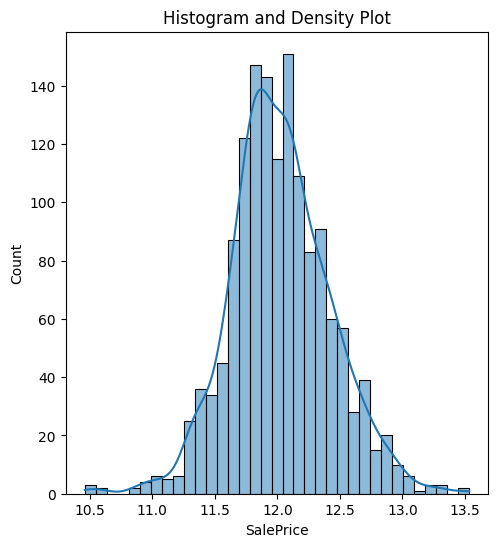

In [15]:
# Plot histogram and density plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title("Histogram and Density Plot")

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   float64
 1   MSSubClass      1460 non-null   float64
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   float64
 4   OverallQual     1460 non-null   float64
 5   OverallCond     1460 non-null   float64
 6   YearBuilt       1460 non-null   float64
 7   YearRemodAdd    1460 non-null   float64
 8   MasVnrArea      1460 non-null   float64
 9   BsmtFinSF1      1460 non-null   float64
 10  BsmtFinSF2      1460 non-null   float64
 11  BsmtUnfSF       1460 non-null   float64
 12  TotalBsmtSF     1460 non-null   float64
 13  1stFlrSF        1460 non-null   float64
 14  2ndFlrSF        1460 non-null   float64
 15  LowQualFinSF    1460 non-null   float64
 16  GrLivArea       1460 non-null   float64
 17  BsmtFullBath    1460 non-null   f

In [17]:
# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == "object"]
len(categorical_cols)

40

In [18]:
categorical_cols = X.select_dtypes(include=['object']).columns
# Fill null values with 'missing' in categorical columns
X[categorical_cols] = X[categorical_cols].fillna('missing')

In [19]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [22]:
# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [21]:
# Preprocessing of validation data, get predictions
preds = model.fit(X_valid)

# Evaluate the model
score = mean_squared_error(y_valid, preds, squared=False)
print('RMSE:', score)

# Preprocessing of test data, fit model
test_preds = model.predict(test_data)

# Save test predictions to file
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': np.exp(test_preds)})  # Apply inverse of log transformation
output.to_csv('submission.csv', index=False)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.